In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
import io
from PIL import Image
import os
from scipy.stats import stats
import matplotlib.image as mpimg
from matplotlib.image import imread

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


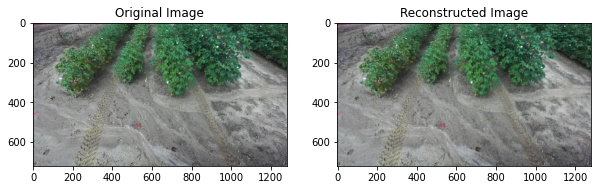

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


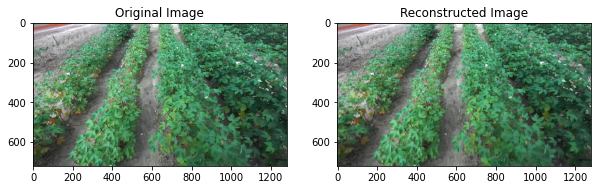

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


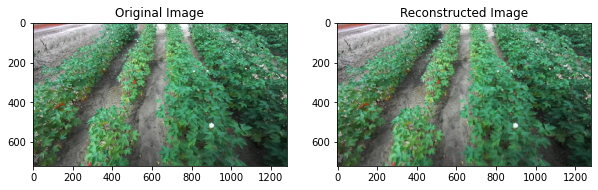

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


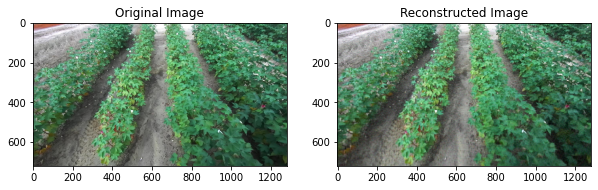

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


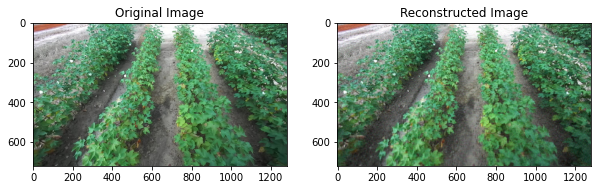

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


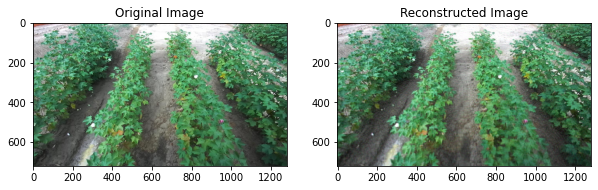

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


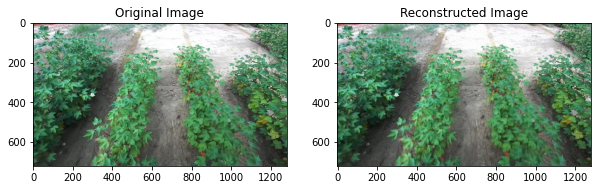

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


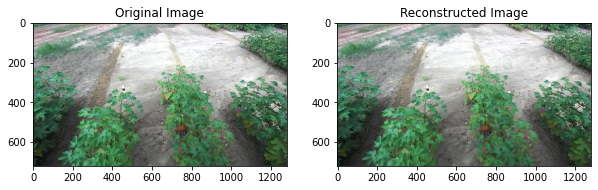

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


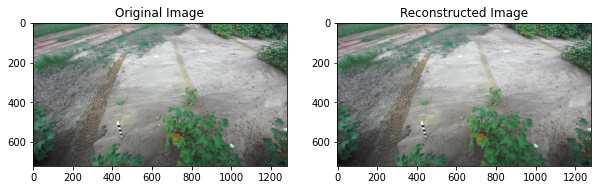

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


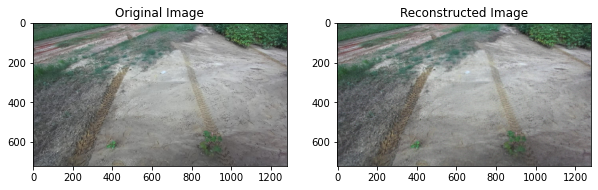

In [76]:
directory = '../Cotton_data/080621/'

pca_b = PCA(n_components=100)
pca_g = PCA(n_components=100)
pca_r = PCA(n_components=100)

blue_variance = []
green_variance = []
red_variance = []

image_byte_size = 0
components_byte_size = 0

listsize = 0

for filename in os.listdir(directory):
    # pca process for each image in directory
    listsize += 1
        
    f = os.path.join(directory, filename)
    img = cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB)
    image_byte_size += img.nbytes
    blue, green, red = cv2.split(img)
    
    df_blue = blue/255
    df_green = green/255
    df_red = red/255
    
    pca_b.fit(df_blue)
    trans_pca_b = pca_b.transform(df_blue)
    pca_g.fit(df_green)
    trans_pca_g = pca_g.transform(df_green)
    pca_r.fit(df_red)
    trans_pca_r = pca_r.transform(df_red)
    
    f_no_stem = filename.split('.')[0]
    np.savez_compressed('../Cotton_data/080621_compressed/pca_'+f_no_stem, b=np.float16(trans_pca_b), g=np.float16(trans_pca_g), r=np.float16(trans_pca_r))
    components_byte_size += np.float16(trans_pca_b).nbytes*3
    
    #dont print, add to list
    blue_variance.append(sum(pca_b.explained_variance_ratio_))
    green_variance.append(sum(pca_g.explained_variance_ratio_))
    red_variance.append(sum(pca_r.explained_variance_ratio_))
    
    # sanity check: print reconstructed results for every 20 images
    # potential issue: exact pca model may also need to be saved? because pca for each channel is fit
    if (listsize % 20 == 1):
        compressed_np = np.load('../Cotton_data/080621_compressed/pca_'+f_no_stem+'.npz')
        
        blue_c = compressed_np['b']
        green_c = compressed_np['g']
        red_c = compressed_np['r']

        b_arr_c = pca_b.inverse_transform(blue_c)
        g_arr_c = pca_g.inverse_transform(green_c)
        r_arr_c = pca_r.inverse_transform(red_c)

        img_reconstruct = (cv2.merge((b_arr_c, g_arr_c, r_arr_c)))

        fig = plt.figure(figsize=(10, 7.2))
        fig.add_subplot(121)
        plt.title("Original Image")
        plt.imshow(img)
        fig.add_subplot(122)
        plt.title("Reconstructed Image")
        plt.imshow(img_reconstruct)
        plt.show()

In [77]:
print("Number of images in folder: ", listsize)
print("Blue variance average = ", sum(blue_variance)/listsize)
print("Green variance average = ", sum(green_variance)/listsize)
print("Red variance average = ", sum(red_variance)/listsize)

Number of images in folder:  184
Blue variance average =  0.9441805770455898
Green variance average =  0.9415999710943304
Red variance average =  0.9460792049841684


# Size Reduction

image directory size: 29.9 MB (31,426,501 bytes)
pca size: 71.3 MB (74,831,077  bytes) !!

jpeg compression means image directory is still larger... though technically with number of bytes that's not the case.
should report both, likely

In [81]:
print("Images size: ", image_byte_size)
print("Components size: ", components_byte_size)
print("Percent Reduction: ", (image_byte_size-components_byte_size)/image_byte_size * 100)

Images size:  508723200
Components size:  79488000
Percent Reduction:  84.375
